In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Reading data from csv file

dataset = pd.read_csv('../DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

In [3]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [5]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
4139/4139 [==============================] - 3s 572us/step - loss: 17.2590 - accuracy: 0.0000e+00 - val_loss: 14.9931 - val_accuracy: 0.0000e+00
Epoch 2/100
4139/4139 [==============================] - 2s 547us/step - loss: 15.0738 - accuracy: 0.0000e+00 - val_loss: 14.8863 - val_accuracy: 0.0000e+00
Epoch 3/100
4139/4139 [==============================] - 2s 573us/step - loss: 15.0720 - accuracy: 0.0000e+00 - val_loss: 15.2135 - val_accuracy: 0.0000e+00
Epoch 4/100
4139/4139 [==============================] - 3s 630us/step - loss: 15.0734 - accuracy: 0.0000e+00 - val_loss: 14.8781 - val_accuracy: 0.0000e+00
Epoch 5/100
4139/4139 [==============================] - 2s 563us/step - loss: 15.0382 - accuracy: 0.0000e+00 - val_loss: 14.9108 - val_accuracy: 0.0000e+00
Epoch 6/100
4139/4139 [==============================] - 2s 571us/step - loss: 15.0388 - accuracy: 0.0000e+00 - val_loss: 14.9467 - val_accuracy: 0.0000e+00
Epoch 7/100
4139/4139 [==============================] - 2

4139/4139 [==============================] - 3s 611us/step - loss: 2.8218 - accuracy: 0.0000e+00 - val_loss: 2.8803 - val_accuracy: 0.0000e+00
Epoch 54/100
4139/4139 [==============================] - 2s 576us/step - loss: 2.7884 - accuracy: 0.0000e+00 - val_loss: 3.3421 - val_accuracy: 0.0000e+00
Epoch 55/100
4139/4139 [==============================] - 2s 586us/step - loss: 2.8579 - accuracy: 0.0000e+00 - val_loss: 2.4075 - val_accuracy: 0.0000e+00
Epoch 56/100
4139/4139 [==============================] - 3s 707us/step - loss: 2.8321 - accuracy: 0.0000e+00 - val_loss: 2.6198 - val_accuracy: 0.0000e+00
Epoch 57/100
4139/4139 [==============================] - 3s 726us/step - loss: 2.7219 - accuracy: 0.0000e+00 - val_loss: 2.3885 - val_accuracy: 0.0000e+00
Epoch 58/100
4139/4139 [==============================] - 3s 735us/step - loss: 2.7378 - accuracy: 0.0000e+00 - val_loss: 2.2849 - val_accuracy: 0.0000e+00
Epoch 59/100
4139/4139 [==============================] - 3s 728us/step - los

In [7]:
# Prediction

y_pred = classifier.predict(x_test)

In [7]:
# Mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

3.789683473205236

In [8]:
# R2 Score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8099105667037538

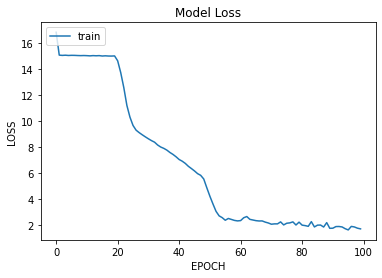

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

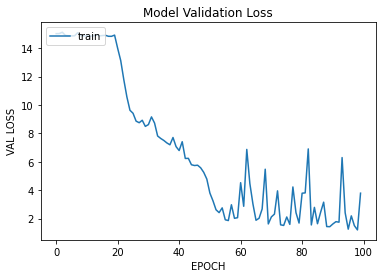

In [10]:
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

In [1]:
def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

NameError: name 'plt' is not defined

In [ ]:
# Generating random set

df = pd.DataFrame(dataset);
rand_frame = df.sample(n = 300)

rand_x = rand_frame.iloc[:, 0:3].values
rand_y = rand_frame.iloc[:, 3].values

y_pred_rand = classifier.predict(rand_x)

generatePredictionPlot(y_pred_rand, rand_y)

In [ ]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(13, 15, SAMPLE_SIZE)
rand_height = randomSample(13, 15, SAMPLE_SIZE)
rand_freq = randomSample(1, 5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])

y_pred_rand = classifier.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)